<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/Predicting_Coupon_Acceptance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,precision_score,recall_score,f1_score

In [2]:
# loading the data set
data = pd.read_csv('Ds_Data.csv')

In [3]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [6]:
null_counts = data.isnull().sum()
null_counts


,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [7]:
# Filling null values with the mode for categorical features
for col in ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    data[col] = data[col].fillna(data[col].mode()[0])
#Fill missing numerical values with the mean
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].mean())

print(data.isnull().sum().sum())

0


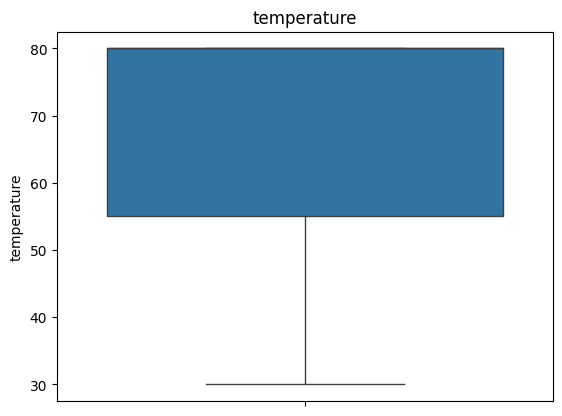

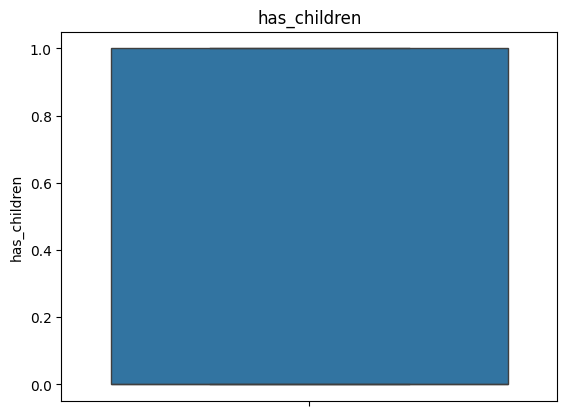

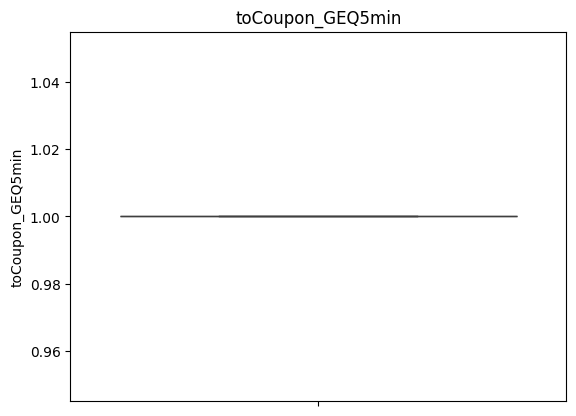

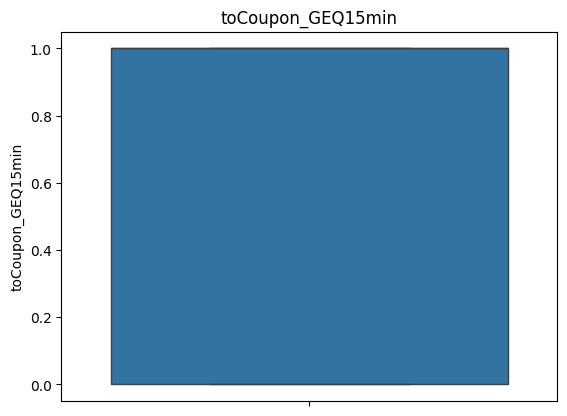

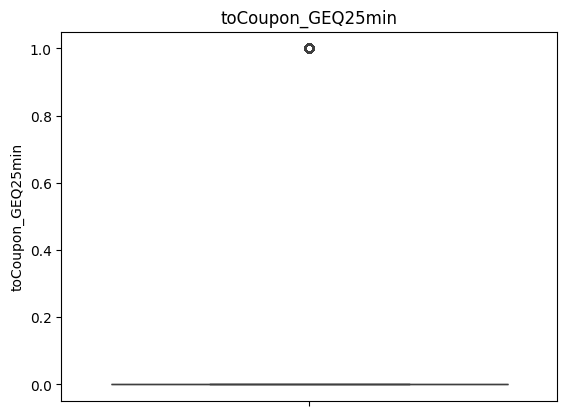

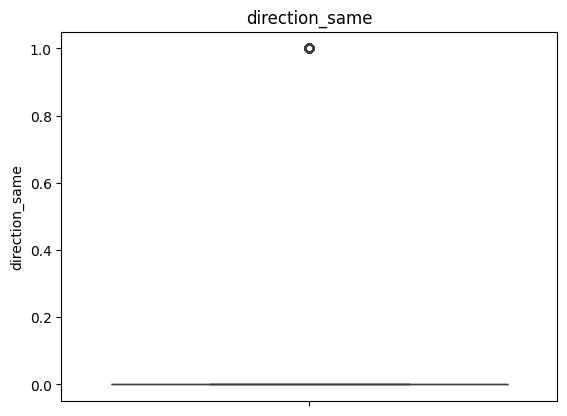

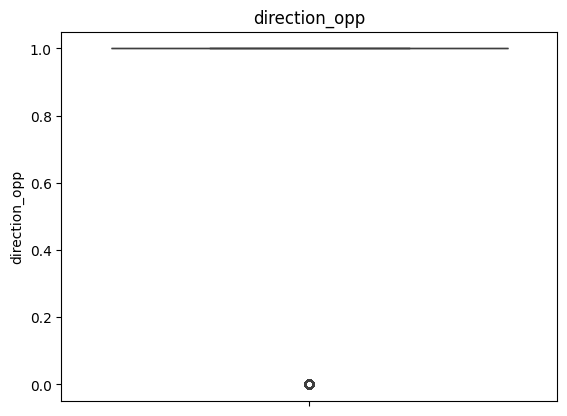

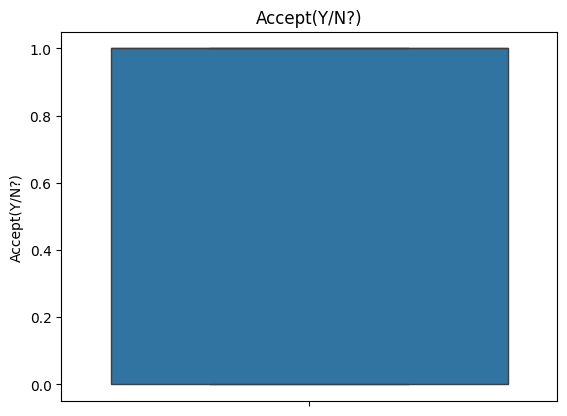

<Figure size 640x480 with 0 Axes>

In [8]:
# plotting boxplot for outliers
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float6':
      sns.boxplot(data[col])
      plt.title(col)
      plt.show()
      plt.clf()


In [9]:
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


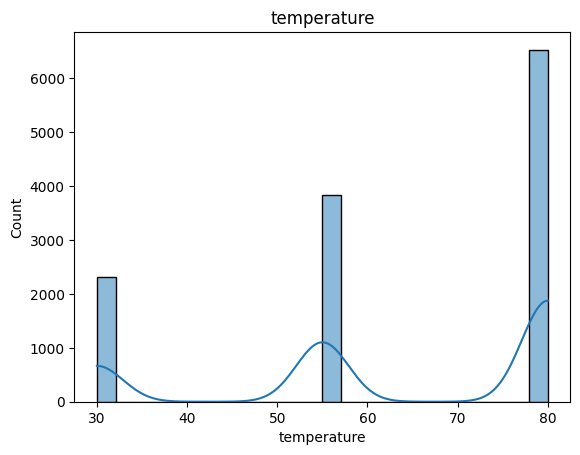

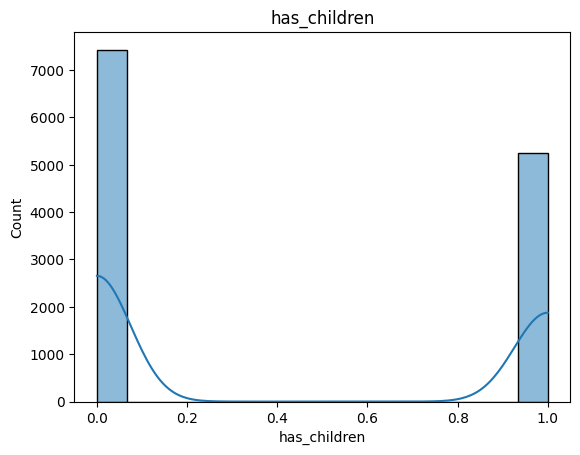

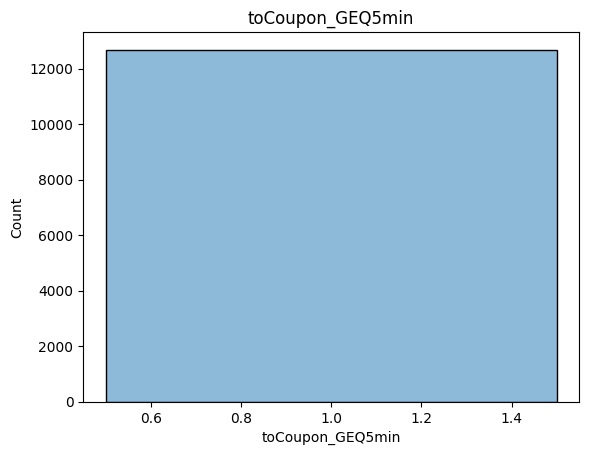

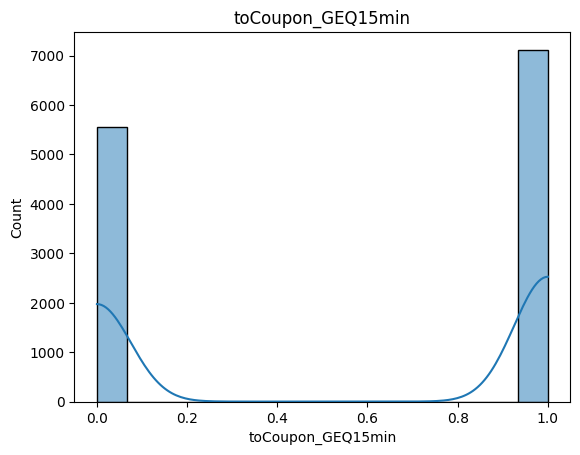

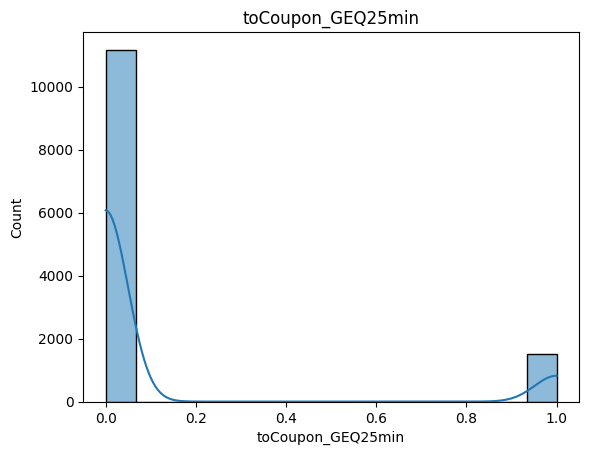

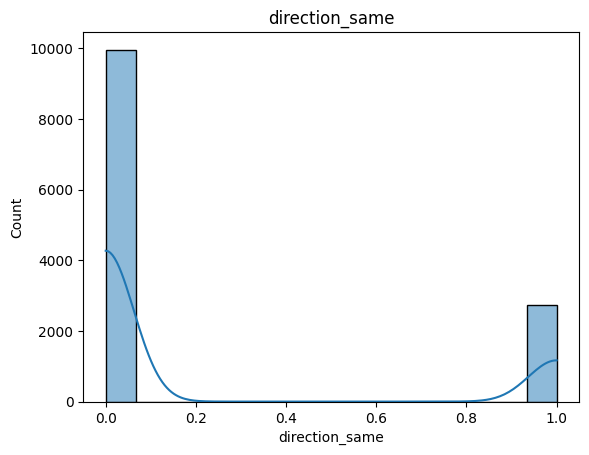

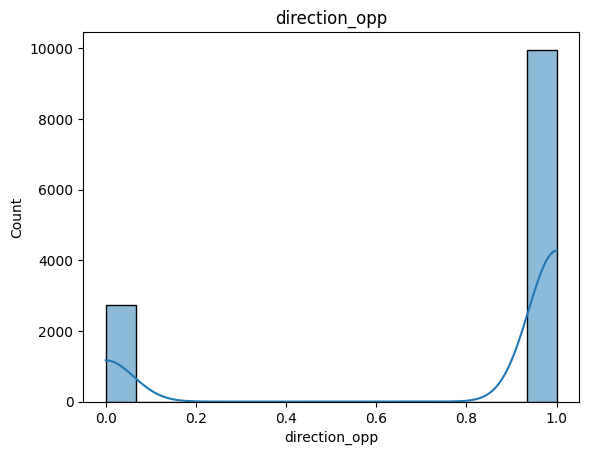

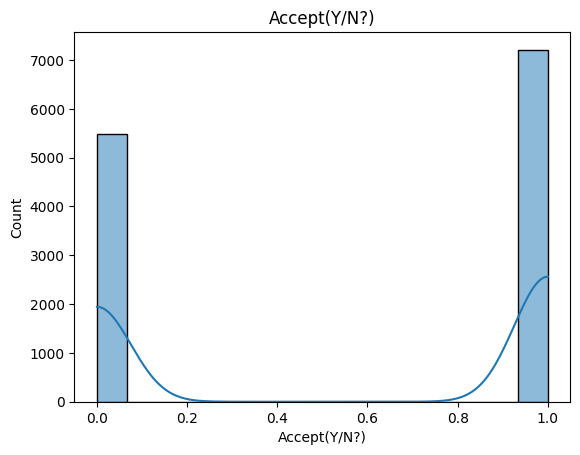

<Figure size 640x480 with 0 Axes>

In [10]:
# Distribution Plots
numerical_data = data.select_dtypes(include=np.number).columns
for col in numerical_data:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()
    plt.clf()

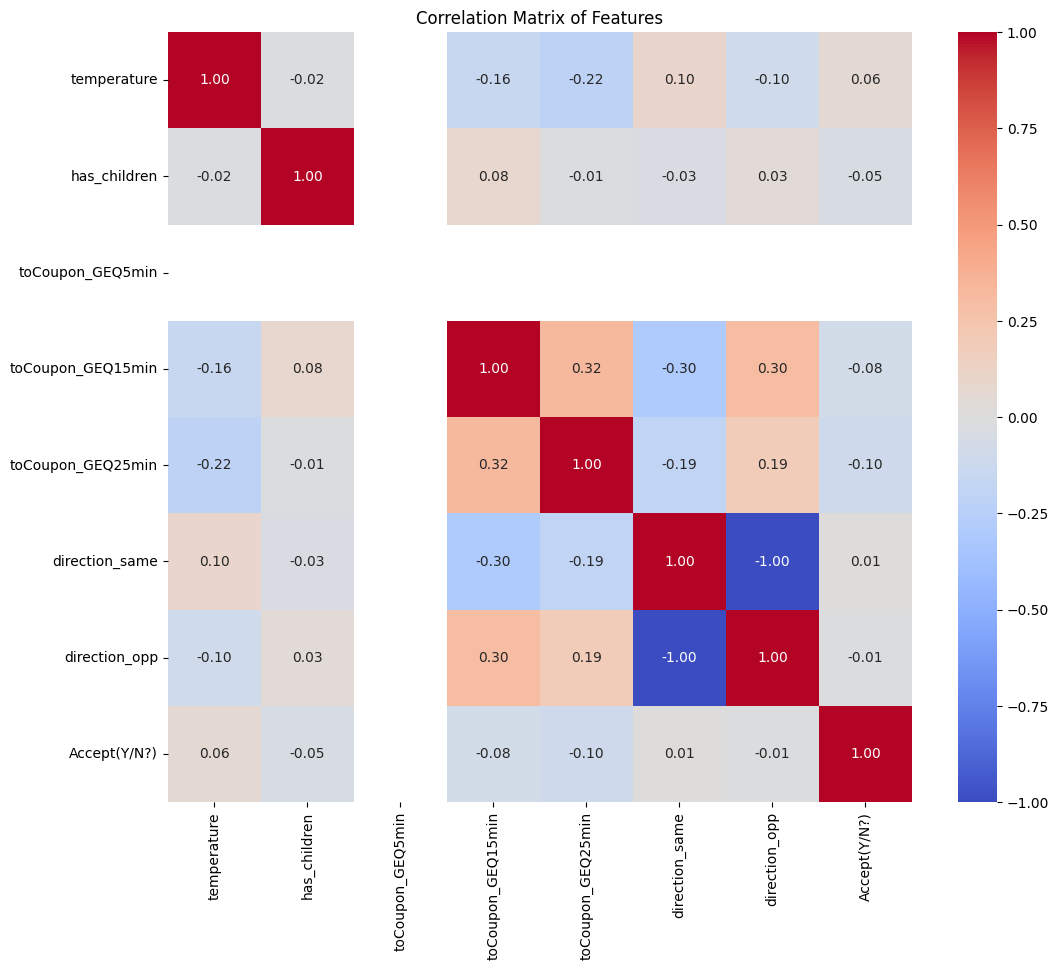

In [11]:
# Calculate the correlation matrix, but only for numerical features
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [12]:
correlations = data[numerical_data].corr()
print(correlations['Accept(Y/N?)'].sort_values(ascending=False))

Accept(Y/N?)         1.000000
temperature          0.061240
direction_same       0.014570
direction_opp       -0.014570
has_children        -0.045557
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Accept(Y/N?), dtype: float64



Analyzing bias in destination:
destination
No Urgent Place    0.495348
Home               0.255203
Work               0.249448
Name: proportion, dtype: float64
Accept(Y/N?)             0          1
destination                          
Home             49.366698  50.633302
No Urgent Place  36.622633  63.377367
Work             49.778761  50.221239

Analyzing bias in passanger:
passanger
Alone        0.575922
Friend(s)    0.260013
Partner      0.084752
Kid(s)       0.079313
Name: proportion, dtype: float64
Accept(Y/N?)          0          1
passanger                         
Alone         47.419576  52.580424
Friend(s)     32.656155  67.343845
Kid(s)        49.502982  50.497018
Partner       40.465116  59.534884

Analyzing bias in weather:
weather
Sunny    0.793835
Snowy    0.110769
Rainy    0.095396
Name: proportion, dtype: float64
Accept(Y/N?)          0          1
weather                           
Rainy         53.719008  46.280992
Snowy         52.953737  47.046263
Sunny         4

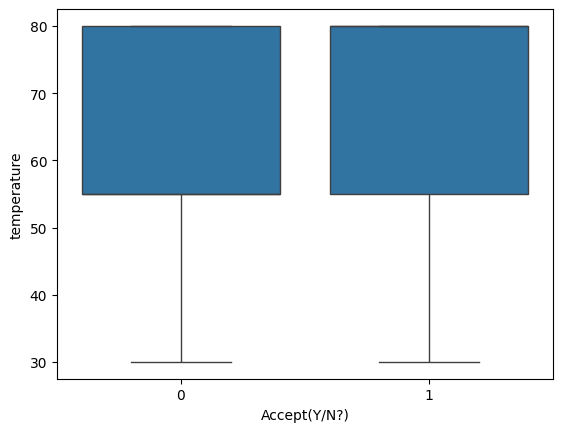

               count       mean        std   min   25%   50%   75%   max
Accept(Y/N?)                                                            
0             5474.0  61.955608  19.327919  30.0  55.0  55.0  80.0  80.0
1             7210.0  64.323856  18.959363  30.0  55.0  80.0  80.0  80.0

Analyzing potential bias in has_children for different acceptance levels:


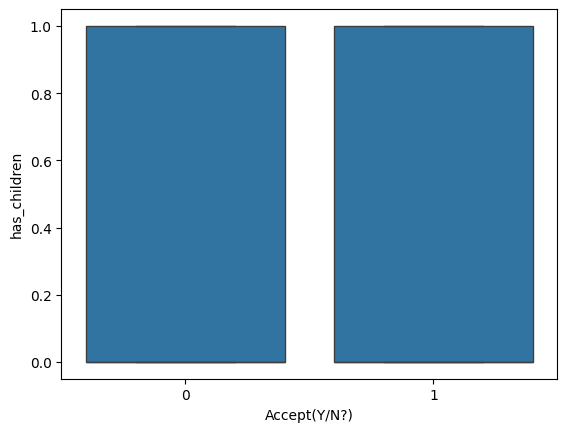

               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)                                                     
0             5474.0  0.439898  0.496420  0.0  0.0  0.0  1.0  1.0
1             7210.0  0.394591  0.488797  0.0  0.0  0.0  1.0  1.0

Analyzing potential bias in toCoupon_GEQ5min for different acceptance levels:


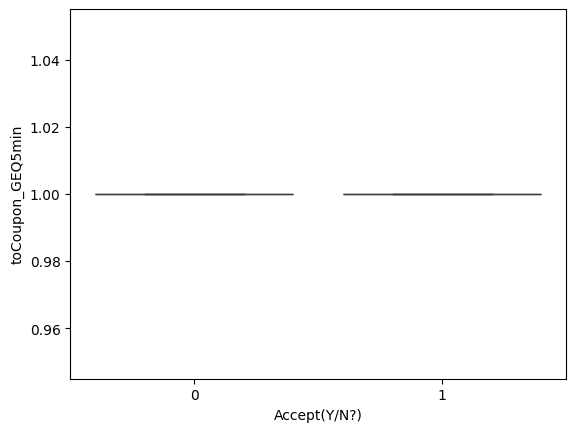

               count  mean  std  min  25%  50%  75%  max
Accept(Y/N?)                                            
0             5474.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1             7210.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

Analyzing potential bias in toCoupon_GEQ15min for different acceptance levels:


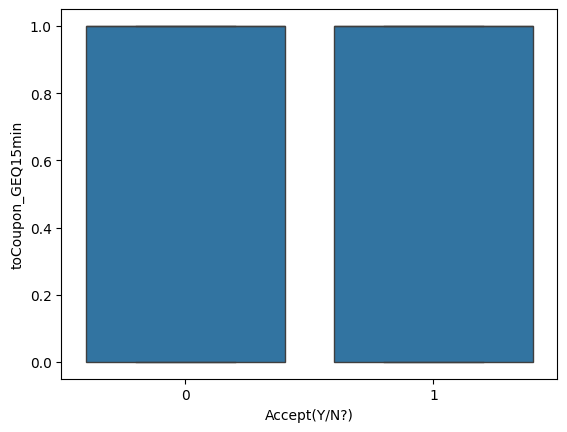

               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)                                                     
0             5474.0  0.607965  0.488249  0.0  0.0  1.0  1.0  1.0
1             7210.0  0.526214  0.499347  0.0  0.0  1.0  1.0  1.0

Analyzing potential bias in toCoupon_GEQ25min for different acceptance levels:


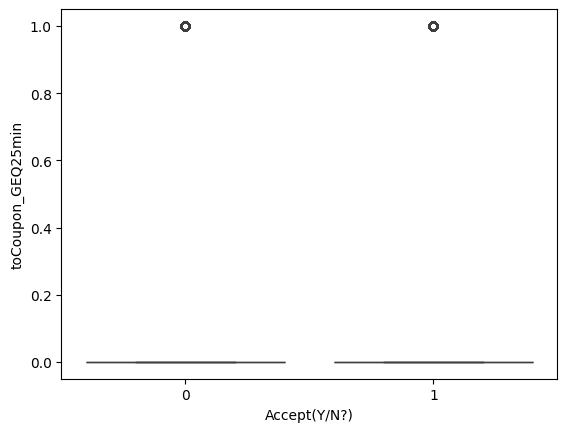

               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)                                                     
0             5474.0  0.157654  0.364450  0.0  0.0  0.0  0.0  1.0
1             7210.0  0.089875  0.286023  0.0  0.0  0.0  0.0  1.0

Analyzing potential bias in direction_same for different acceptance levels:


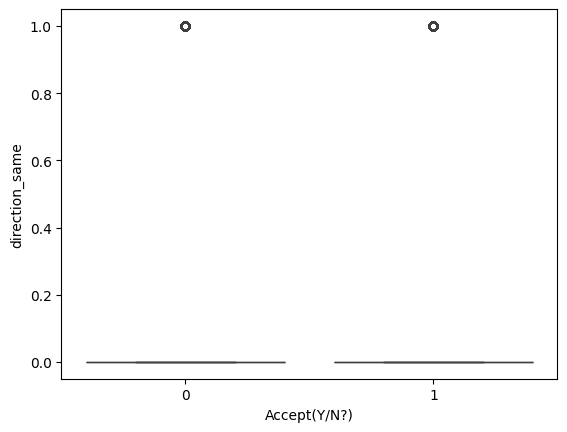

               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)                                                     
0             5474.0  0.207892  0.405836  0.0  0.0  0.0  0.0  1.0
1             7210.0  0.219972  0.414256  0.0  0.0  0.0  0.0  1.0

Analyzing potential bias in direction_opp for different acceptance levels:


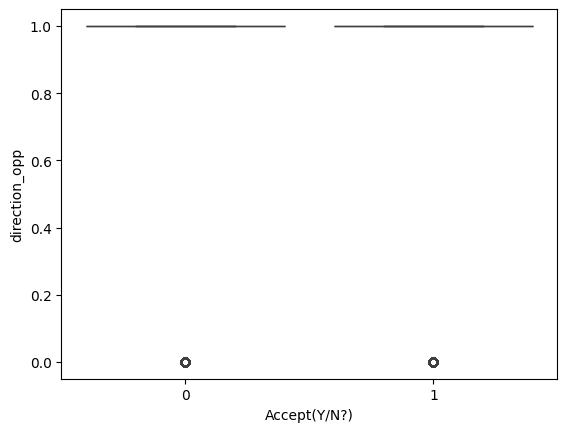

               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)                                                     
0             5474.0  0.792108  0.405836  0.0  1.0  1.0  1.0  1.0
1             7210.0  0.780028  0.414256  0.0  1.0  1.0  1.0  1.0

Analyzing potential bias in Accept(Y/N?) for different acceptance levels:


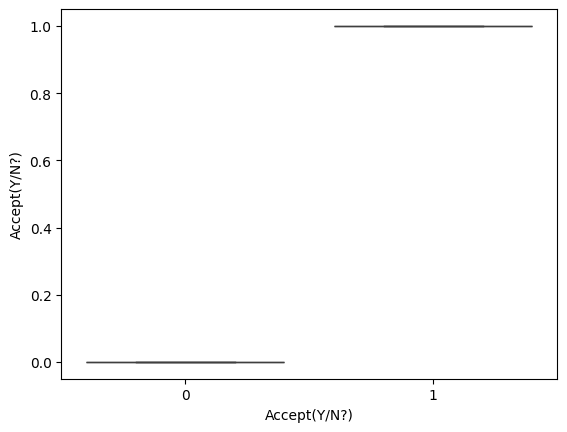

               count  mean  std  min  25%  50%  75%  max
Accept(Y/N?)                                            
0             5474.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1             7210.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

Mean Income (Accepted): 47614.925912670005
Mean Income (Rejected): 49825.80847614636


<Figure size 640x480 with 0 Axes>

In [13]:
# Analyze potential biases related to categorical features
categorical_cols = data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(f"\nAnalyzing bias in {col}:")
    print(data[col].value_counts(normalize=True))  # Check distribution
    # Further analysis for each categorical feature based on your needs.
    # E.g., cross-tabulation with 'Accept(Y/N?)' to check acceptance rates for each category.
    print(pd.crosstab(data[col], data['Accept(Y/N?)'], normalize='index') * 100)


# Analyze potential biases related to numerical features
for col in numerical_data:
    print(f"\nAnalyzing potential bias in {col} for different acceptance levels:")

    # Boxplots can show distribution differences between acceptance levels
    sns.boxplot(x='Accept(Y/N?)', y=col, data=data)
    plt.show()
    plt.clf()

    # Calculate and compare summary statistics
    acceptance_groups = data.groupby('Accept(Y/N?)')
    print(acceptance_groups[col].describe())

# 1. Extract lower and upper bounds
data['income_lower'] = data['income'].str.extract('^\$(\d+)').astype(float)
data['income_upper'] = data['income'].str.extract('\- \$(\d+)').astype(float)

# 2. Calculate the midpoint as a numerical representation
data['income_midpoint'] = (data['income_lower'] + data['income_upper']) / 2

# 3. Now you can calculate the mean on 'income_midpoint'
mean_income_accepted = data[data['Accept(Y/N?)'] == 1]['income_midpoint'].mean()
mean_income_rejected = data[data['Accept(Y/N?)'] == 0]['income_midpoint'].mean()
print(f"\nMean Income (Accepted): {mean_income_accepted}")
print(f"Mean Income (Rejected): {mean_income_rejected}")

# Statistical tests to quantify the significance of observed differences (e.g., t-test)


# ... (rest of your code)


In [14]:
print(data[data['Accept(Y/N?)'] == 1]['income_midpoint'].isnull().sum())
print(data[data['Accept(Y/N?)'] == 0]['income_midpoint'].isnull().sum())

1622
1156


In [15]:
data['income_midpoint'] = pd.to_numeric(data['income_midpoint'], errors='coerce')
data['Accept(Y/N?)'] = data['Accept(Y/N?)'].astype(int) # Or bool if appropriate

In [16]:
# Impute missing values with the mean
data['income_midpoint'] = data['income_midpoint'].fillna(data['income_midpoint'].mean())
data['income_lower'] = data['income_lower'].fillna(data['income_lower'].mean())
data['income_upper'] = data['income_upper'].fillna(data['income_upper'].mean())

In [17]:
print(data[data['Accept(Y/N?)'] == 1]['income_midpoint'].isnull().sum())
print(data[data['Accept(Y/N?)'] == 0]['income_midpoint'].isnull().sum())

0
0


In [18]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(data[data['Accept(Y/N?)'] == 1]['income_midpoint'],
                           data[data['Accept(Y/N?)'] == 0]['income_midpoint'])

print(f"\nT-test results (Income): t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


T-test results (Income): t-statistic = -4.657, p-value = 0.000


In [19]:
data.head()


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),income_lower,income_upper,income_midpoint
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,1~3,1,0,0,0,1,1,37500.0,49999.0,43749.5
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,1,0,0,0,1,0,37500.0,49999.0,43749.5
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1~3,1,1,0,0,1,1,37500.0,49999.0,43749.5
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,1,1,0,0,1,0,37500.0,49999.0,43749.5
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,1~3,1,1,0,0,1,0,37500.0,49999.0,43749.5


In [20]:
# Identify categorical columns for one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns

# Print the identified columns
print("Columns suitable for one-hot encoding:")
categorical_cols


Columns suitable for one-hot encoding:


Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'car',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
# Separate features (X) and target variable (y)
X = data.drop('Accept(Y/N?)', axis=1)
y = data['Accept(Y/N?)']
# Identify numerical features for scaling
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply MinMaxScaler to numerical features
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Feature selection using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

# Create a new DataFrame with selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)

Selected features: Index(['temperature', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'weather_Snowy', 'weather_Sunny',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'Bar_never', 'CoffeeHouse_never'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #adjust test_size and random_state as needed


In [23]:
X_test

,temperature,toCoupon_GEQ15min,toCoupon_GEQ25min,destination_No Urgent Place,destination_Work,passanger_Friend(s),weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,Bar_never,CoffeeHouse_never
9849,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8457,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10270,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7852,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,0.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6753,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [24]:
y

,Accept(Y/N?)
0,1
1,0
2,1
3,0
4,0
...,...
12679,1
12680,1
12681,0
12682,0


In [25]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
]

In [26]:
null_counts = data.isnull().sum()
null_counts


,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [27]:
# Define the parameter grid for each model
param_grids = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
}

# Perform hyperparameter tuning for each model
for model_name in param_grids:
    model = eval(model_name)() # Create the model object dynamically
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

    # Evaluate the best model on the test set
    y_pred = grid_search.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")


Best hyperparameters for LogisticRegression: {'C': 0.1}
Best score for LogisticRegression: 0.6707415383345433
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1128
           1       0.68      0.77      0.72      1409

    accuracy                           0.67      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537

Best hyperparameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 10}
Best score for DecisionTreeClassifier: 0.694197777545783
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1128
           1       0.70      0.78      0.74      1409

    accuracy                           0.69      2537
   macro avg       0.69      0.68      0.68      2537
weighted avg       0.69      0.69      0.69   

In [28]:
# Evaluate the best model on the test set and print performance metrics
for model_name in param_grids:
    model = eval(model_name)()
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    print("-" * 30) # separator between models


Performance Metrics for LogisticRegression:
Accuracy: 0.6732361056365787
Precision: 0.671394201889962
Recall: 0.6732361056365787
F1 Score: 0.6691834786304197
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1128
           1       0.68      0.77      0.72      1409

    accuracy                           0.67      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537

------------------------------
Performance Metrics for DecisionTreeClassifier:
Accuracy: 0.6945210878990934
Precision: 0.6934290065852414
Recall: 0.6945210878990934
F1 Score: 0.6907324438342283
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1128
           1       0.70      0.79      0.74      1409

    accuracy                           0.69      2537
   macr

<ipython-input-29-be2f6661a44c>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_metrics = pd.concat([performance_metrics, pd.DataFrame([{'Model': model_name,


                        Model  Accuracy  Precision    Recall  F1 Score
0          LogisticRegression  0.673236   0.671394  0.673236  0.669183
1      DecisionTreeClassifier  0.694521   0.693429  0.694521  0.690732
2      RandomForestClassifier  0.698857   0.698951  0.698857  0.693634
3                         SVC  0.699645   0.706273  0.699645  0.688964
4  GradientBoostingClassifier  0.695309   0.697489  0.695309  0.687620


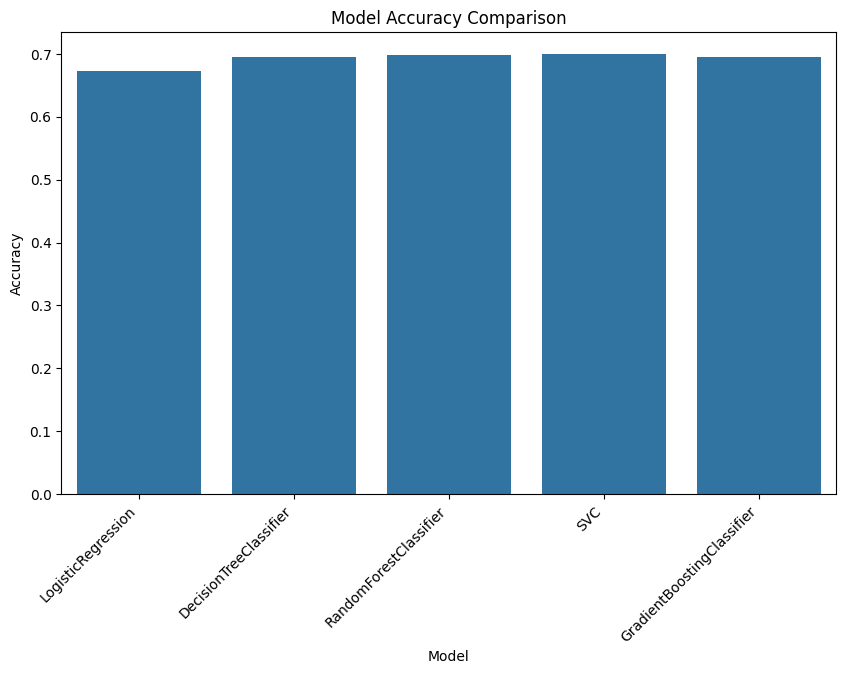

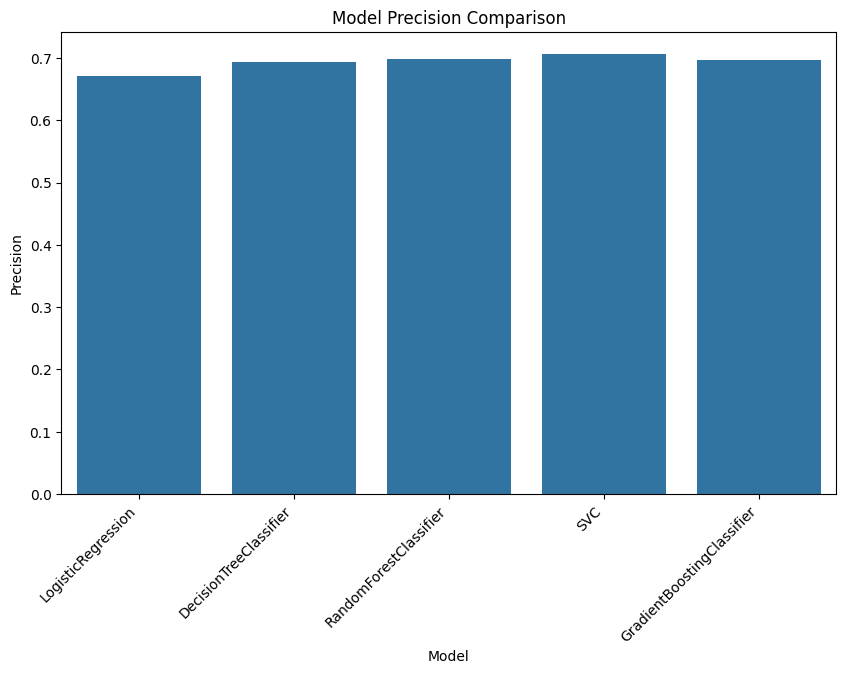

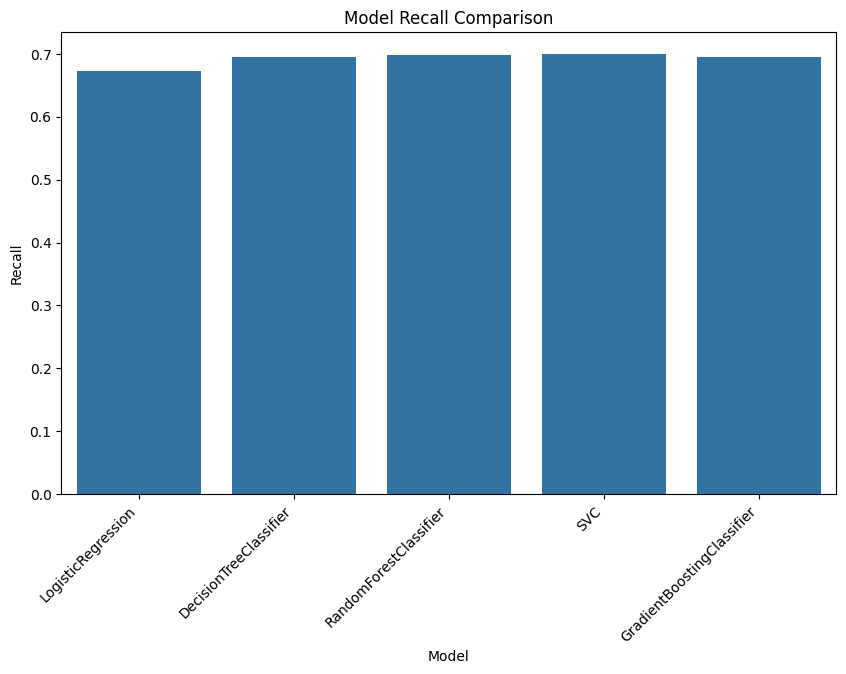

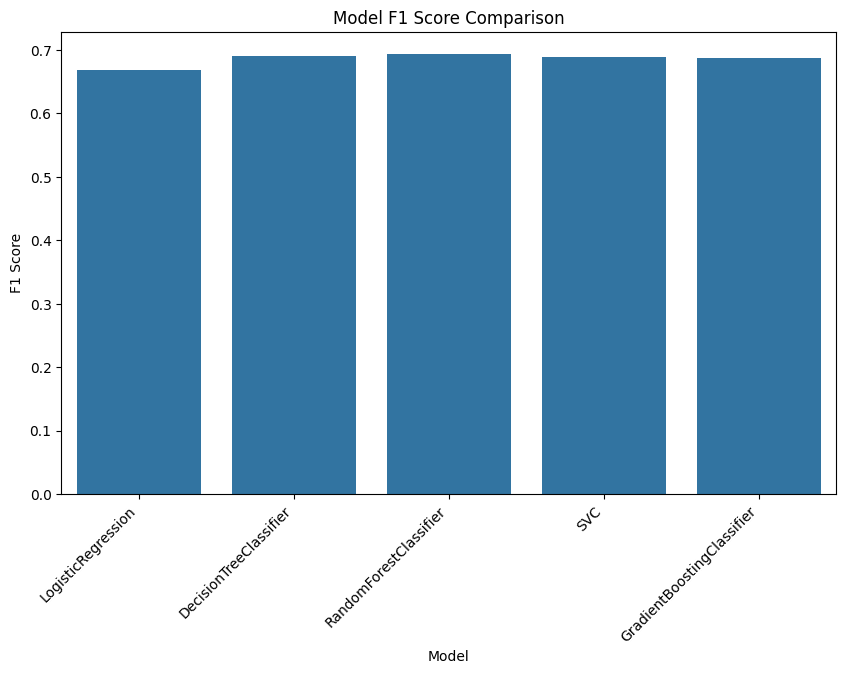

In [29]:
performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name in param_grids:
    model = eval(model_name)()
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics = pd.concat([performance_metrics, pd.DataFrame([{'Model': model_name,
                                                                        'Accuracy': accuracy,
                                                                        'Precision': precision,
                                                                        'Recall': recall,
                                                                        'F1 Score': f1}])], ignore_index=True)


# Display the performance metrics DataFrame
print(performance_metrics)

# Optionally, visualize the performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_metrics)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=performance_metrics)
plt.title('Model Precision Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=performance_metrics)
plt.title('Model Recall Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=performance_metrics)
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()


In [30]:
# Find the best model based on the highest accuracy
best_model_index = performance_metrics['Accuracy'].idxmax()
best_model_name = performance_metrics.loc[best_model_index, 'Model']
best_model_accuracy = performance_metrics.loc[best_model_index, 'Accuracy']

print(f"\nThe best model based on accuracy is: {best_model_name} with an accuracy of {best_model_accuracy}")

# Find the best model based on other metrics (e.g., F1-score)
best_model_index_f1 = performance_metrics['F1 Score'].idxmax()
best_model_name_f1 = performance_metrics.loc[best_model_index_f1, 'Model']
best_model_f1 = performance_metrics.loc[best_model_index_f1, 'F1 Score']

print(f"\nThe best model based on F1 Score is: {best_model_name_f1} with an F1 Score of {best_model_f1}")

# You can similarly find the best model based on precision or recall:
best_model_index_precision = performance_metrics['Precision'].idxmax()
best_model_name_precision = performance_metrics.loc[best_model_index_precision, 'Model']
best_model_precision = performance_metrics.loc[best_model_index_precision, 'Precision']

print(f"\nThe best model based on precision is: {best_model_name_precision} with a precision of {best_model_precision}")

best_model_index_recall = performance_metrics['Recall'].idxmax()
best_model_name_recall = performance_metrics.loc[best_model_index_recall, 'Model']
best_model_recall = performance_metrics.loc[best_model_index_recall, 'Recall']

print(f"\nThe best model based on recall is: {best_model_name_recall} with a recall of {best_model_recall}")



The best model based on accuracy is: SVC with an accuracy of 0.6996452502956247

The best model based on F1 Score is: RandomForestClassifier with an F1 Score of 0.6936337100210765

The best model based on precision is: SVC with a precision of 0.7062727187871547

The best model based on recall is: SVC with a recall of 0.6996452502956247


In [31]:
# prompt: best model overall

# Find the best model based on a weighted average of accuracy, precision, recall, and F1 score
performance_metrics['Weighted Score'] = 0.25 * (performance_metrics['Accuracy'] + performance_metrics['Precision'] + performance_metrics['Recall'] + performance_metrics['F1 Score'])
best_model_index_weighted = performance_metrics['Weighted Score'].idxmax()
best_model_name_weighted = performance_metrics.loc[best_model_index_weighted, 'Model']
best_model_weighted_score = performance_metrics.loc[best_model_index_weighted, 'Weighted Score']

print(f"\nThe best model based on weighted average of all metrics is: {best_model_name_weighted} with a weighted score of {best_model_weighted_score}")



The best model based on weighted average of all metrics is: SVC with a weighted score of 0.6986317979678971


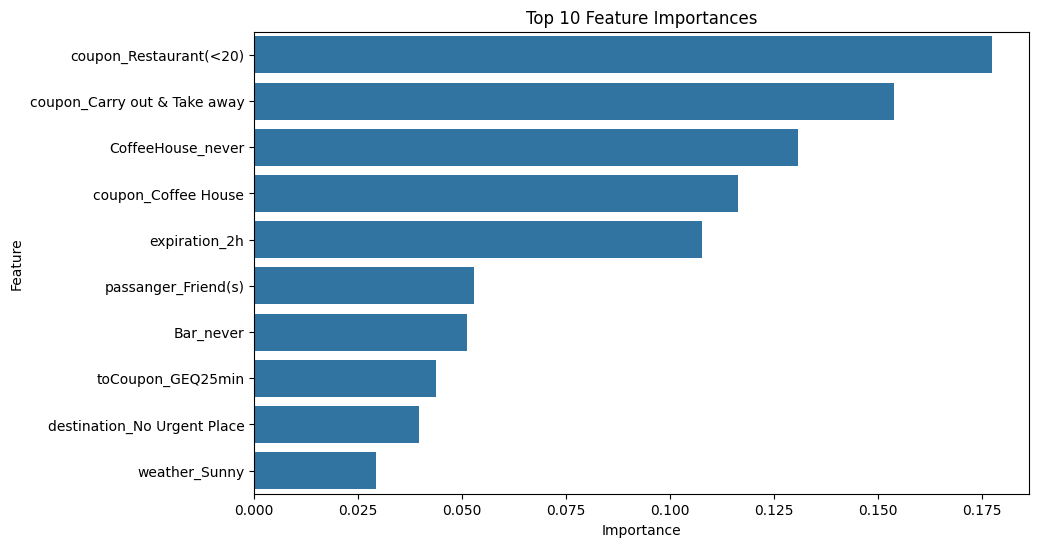

In [32]:

feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = importance_df.head(10)


# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [34]:
print(importance_df)

                         Feature  Importance
11        coupon_Restaurant(<20)    0.177422
8   coupon_Carry out & Take away    0.153742
14             CoffeeHouse_never    0.130732
9            coupon_Coffee House    0.116247
12                 expiration_2h    0.107791
5            passanger_Friend(s)    0.052792
13                     Bar_never    0.051302
2              toCoupon_GEQ25min    0.043793
3    destination_No Urgent Place    0.039545
7                  weather_Sunny    0.029207
0                    temperature    0.027388
1              toCoupon_GEQ15min    0.024041
4               destination_Work    0.023362
10      coupon_Restaurant(20-50)    0.019889
6                  weather_Snowy    0.002747
